# ML Internship Final Project

## Loan Default Prediction System

1. Converting .xlsx to .csv file 


In [3]:
pip install openpyxl



   ---------------------------------------- 0/2 [et-xmlfile]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [ope

In [14]:
import pandas as pd

# Set correct path
file_path = r"C:\Users\USER\Desktop\ML_projects\ML_trainee\Final_Project\Bank_Personal_Loan_Modelling.xlsx"

# List all sheets to identify where the actual data is
xls = pd.ExcelFile(file_path, engine="openpyxl")
print("Available sheets:", xls.sheet_names)

# Now load the correct sheet (replace 'Sheet1' with actual sheet if needed)
df = pd.read_excel(xls, sheet_name="Data")  # change this based on print output

# Preview the data to check if it loaded correctly
print(df.head())

# Drop unnamed columns (junk from extra blank columns in Excel)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Save to CSV
df.to_csv("loan_data.csv", index=False)

print("✅ Successfully converted to 'loan_data.csv'")


Available sheets: ['Description', 'Data']
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
✅ Successfully converted to 'loan_data.csv'


1. Importing required libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


2. Loading the data 

In [16]:
df = pd.read_csv("loan_data.csv")
df.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


3. Data Preprocessing

In [18]:
print(df.columns.tolist())


['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


Converted Personal Loan name to Loan_Status

In [23]:
# Drop unnecessary columns
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)

# Rename target for clarity
df.rename(columns={"Personal Loan": "Loan_Status"}, inplace=True)

# Check for missing values
print(df.isnull().sum())

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Loan_Status', axis=1))

X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['Loan_Status']


Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Loan_Status           0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


4. Train-Test_split

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5. Training the Model

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[884  11]
 [ 36  69]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.86      0.66      0.75       105

    accuracy                           0.95      1000
   macro avg       0.91      0.82      0.86      1000
weighted avg       0.95      0.95      0.95      1000



c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5.1 Training the Model using Decision Tree

In [43]:
# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("🌳 Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("📈 Classification Report (Precision, Recall, F1-Score):\n", classification_report(y_test, y_pred_dt))
print("-" * 50)


🌳 Decision Tree Results
Accuracy: 0.988
Confusion Matrix:
 [[890   5]
 [  7  98]]
📈 Classification Report (Precision, Recall, F1-Score):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.95      0.93      0.94       105

    accuracy                           0.99      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000

--------------------------------------------------


5.2 Training the Model using Random forest

In [42]:
# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("🌲 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("-" * 50)


🌲 Random Forest Results
Accuracy: 0.991
Confusion Matrix:
 [[894   1]
 [  8  97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.99      0.92      0.96       105

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.98      1000
weighted avg       0.99      0.99      0.99      1000

--------------------------------------------------


6. Evaluate Model

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


7. Visualize the features

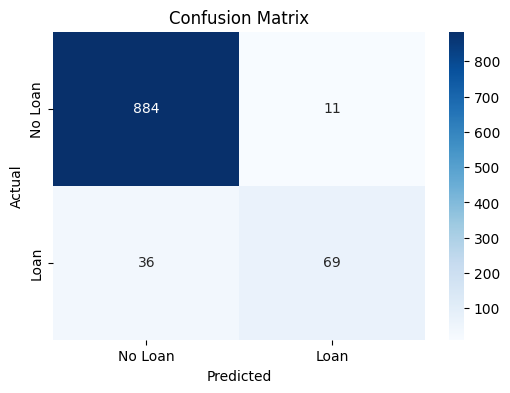

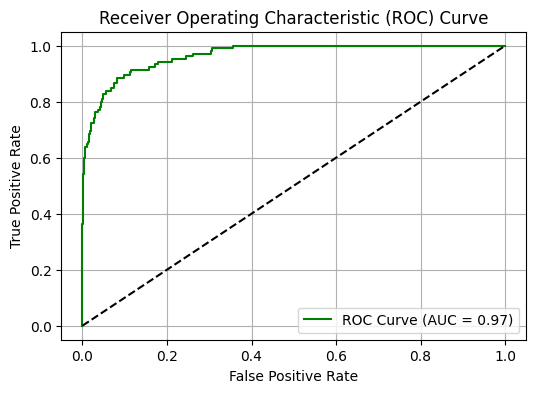

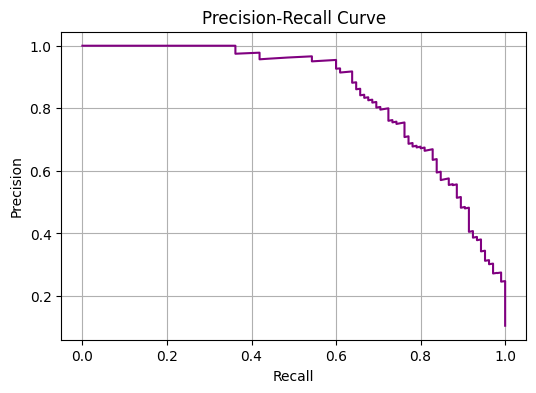

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 2. 📈 ROC Curve
y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 3. 📉 Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()



8. Values


In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ✅ Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(accuracy * 100, 2), "%")

# 📊 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:")
print(cm)

# 📈 Precision, Recall, F1-Score
print("\n📈 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Loan", "Loan"]))


✅ Accuracy: 95.3 %

📊 Confusion Matrix:
[[884  11]
 [ 36  69]]

📈 Classification Report:
              precision    recall  f1-score   support

     No Loan       0.96      0.99      0.97       895
        Loan       0.86      0.66      0.75       105

    accuracy                           0.95      1000
   macro avg       0.91      0.82      0.86      1000
weighted avg       0.95      0.95      0.95      1000



9. Saving the Models

In [44]:
import joblib

# Assume these are your trained models
rf_model = RandomForestClassifier().fit(X_train, y_train)
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
lr_model = LogisticRegression(max_iter=1000).fit(X_train, y_train)

joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(dt_model, 'decision_tree_model.pkl')
joblib.dump(lr_model, 'logistic_regression_model.pkl')



c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logistic_regression_model.pkl']